In [8]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("kausthubkannan/5-flower-types-classification-dataset")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/5-flower-types-classification-dataset


In [167]:
import pandas as pd
import numpy as np
import os
import cv2
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from keras import layers
from keras.models import Sequential, Model
from keras.layers import Conv2D, MaxPooling2D, Input, Flatten, Dense, Dropout, ReLU, BatchNormalization, GlobalAveragePooling2D
from keras.callbacks import EarlyStopping
from tensorflow.keras.applications import DenseNet121, ResNet50, VGG16
from sklearn.metrics import classification_report, confusion_matrix
sns.set()

In [10]:
images, labels = [], []

In [11]:
for i in os.listdir('/kaggle/input/5-flower-types-classification-dataset/flower_images'):
    for j in os.listdir(os.path.join('/kaggle/input/5-flower-types-classification-dataset/flower_images', i)):
        path = os.path.join('/kaggle/input/5-flower-types-classification-dataset/flower_images', i, j)
        img = cv2.imread(path)
        if img is None:
            print('Wrong path')
        else:
            resized_img = cv2.resize(img, (80, 80))
            images.append(resized_img)
            labels.append(i)

In [12]:
df_labels = pd.DataFrame({
    'label' : labels
}
)

In [13]:
print('The size of dataset is:', len(images))
print('The number of classes in the dataset is:', df_labels['label'].nunique())
print('The classes in the dataset are:', df_labels['label'].unique())

The size of dataset is: 5000
The number of classes in the dataset is: 5
The classes in the dataset are: ['Orchid' 'Sunflower' 'Tulip' 'Lotus' 'Lilly']


In [14]:
X, y = shuffle(images, labels)

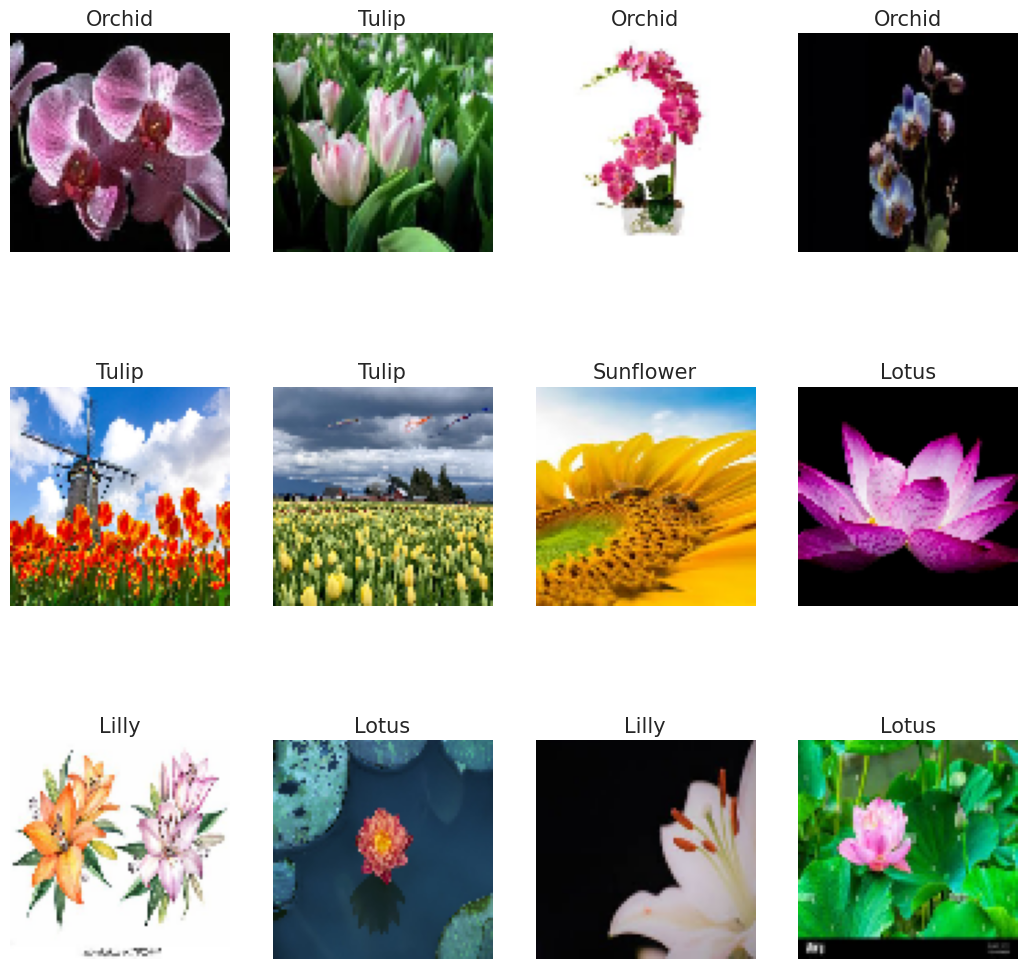

In [15]:
plt.figure(figsize = (13, 13))
for i in range(12):
    ax = plt.subplot(3, 4, i + 1)
    im = cv2.cvtColor(X[i], cv2.COLOR_BGR2RGB)
    plt.imshow(im)
    plt.title(y[i], fontsize = 15)
    plt.axis('off')

In [16]:
le = LabelEncoder()

In [17]:
y_le = le.fit_transform(y)

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y_le, test_size = 0.2, random_state = 101, shuffle = True,
                                                   stratify = y_le)

In [19]:
print('The size of training dataset is:', len(X_train))
print('The size of test dataset is:', len(X_test))
print('The size of each images is:', X_train[0].shape)

The size of training dataset is: 4000
The size of test dataset is: 1000
The size of each images is: (80, 80, 3)


In [20]:
X_train = np.array(X_train)

In [21]:
X_test = np.array(X_test)

In [22]:
X_train_scaled = X_train / 255

In [23]:
X_test_scaled = X_test / 255

In [24]:
model = Sequential()

In [25]:
model.add(Conv2D(32, (3, 3), padding = 'same', activation = 'relu', input_shape = (80, 80, 3)))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.4))
model.add(Conv2D(16, (3, 3), padding = 'same', activation = 'relu', input_shape = (80, 80, 3)))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Flatten())
model.add(Dropout(0.4))
model.add(Dense(32, activation = 'relu'))
model.add(Dropout(0.4))
model.add(Dense(5, activation = 'softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [26]:
model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

In [27]:
early_stopping = EarlyStopping(monitor = 'val_loss', patience = 3)

In [28]:
history = model.fit(X_train_scaled, y_train, epochs = 100, validation_split = 0.1, callbacks = [early_stopping])

Epoch 1/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 10s 41ms/step - accuracy: 0.2573 - loss: 1.6168 - val_accuracy: 0.4600 - val_loss: 1.4043
Epoch 2/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.3738 - loss: 1.4087 - val_accuracy: 0.4875 - val_loss: 1.2794
Epoch 3/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.4208 - loss: 1.3513 - val_accuracy: 0.5100 - val_loss: 1.2439
Epoch 4/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.4351 - loss: 1.2692 - val_accuracy: 0.5300 - val_loss: 1.2010
Epoch 5/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.4642 - loss: 1.2336 - val_accuracy: 0.5675 - val_loss: 1.1698
Epoch 6/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.4643 - loss: 1.2209 - val_accuracy: 0.5325 - val_loss: 1.1533
Epoch 7/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.4749 - loss: 1.1940 - val_accuracy: 0.5575 - val_loss: 1.1252
Epoch 8/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.4982 - loss: 1.1852 - val_ac

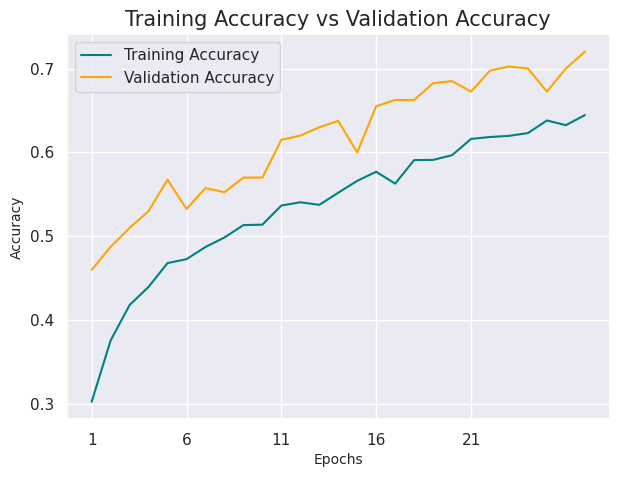

In [29]:
plt.figure(figsize = (7, 5))
plt.plot(history.history['accuracy'], label = 'Training Accuracy', color = 'teal')
plt.plot(history.history['val_accuracy'], label = 'Validation Accuracy', color = 'orange')
plt.title('Training Accuracy vs Validation Accuracy', fontsize = 15)
plt.xlabel('Epochs', fontsize = 10)
plt.ylabel('Accuracy', fontsize = 10)
plt.legend()
plt.xticks(ticks = [0, 5, 10, 15, 20], labels = [1, 6, 11, 16, 21])
plt.show()

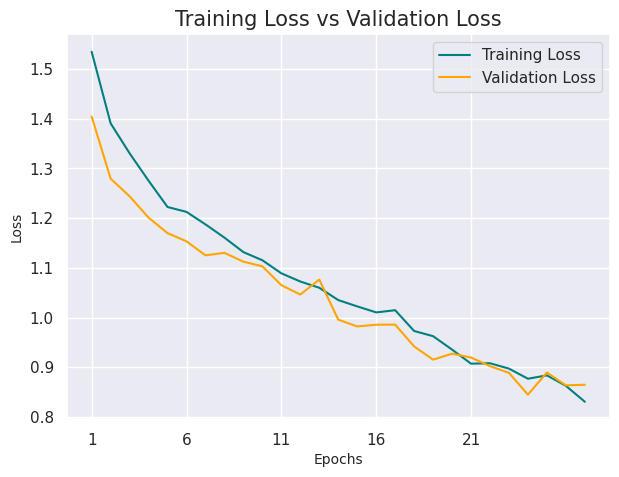

In [30]:
plt.figure(figsize = (7, 5))
plt.plot(history.history['loss'], label = 'Training Loss', color = 'teal')
plt.plot(history.history['val_loss'], label = 'Validation Loss', color = 'orange')
plt.title('Training Loss vs Validation Loss', fontsize = 15)
plt.xlabel('Epochs', fontsize = 10)
plt.ylabel('Loss', fontsize = 10)
plt.legend()
plt.xticks(ticks = [0, 5, 10, 15, 20], labels = [1, 6, 11, 16, 21])
plt.show()

In [31]:
model.evaluate(X_test_scaled, y_test)

32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.7475 - loss: 0.7565


[0.7622392177581787, 0.7319999933242798]

In [32]:
y_p1 = model.predict(X_test_scaled)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


In [33]:
y_pred1 = [np.argmax(i) for i in y_p1]

In [34]:
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       0.69      0.55      0.61       200
           1       0.65      0.83      0.73       200
           2       0.80      0.51      0.62       200
           3       0.92      0.97      0.94       200
           4       0.66      0.80      0.72       200

    accuracy                           0.73      1000
   macro avg       0.74      0.73      0.72      1000
weighted avg       0.74      0.73      0.72      1000



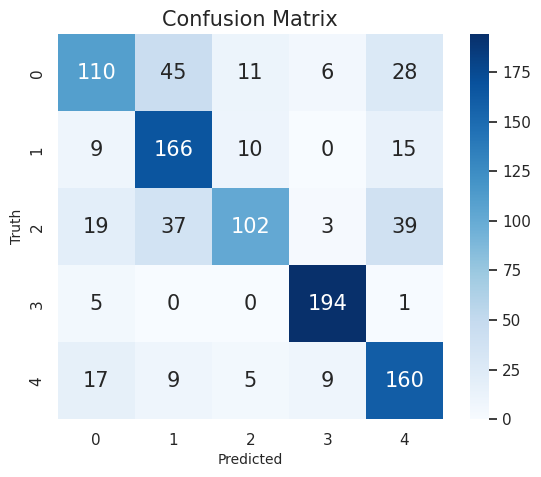

In [35]:
plt.figure(figsize = (7, 5))
sns.heatmap(confusion_matrix(y_test, y_pred1), annot = True, square = True, cbar = True, annot_kws = {'size' : 15}, fmt = 'd',
           cmap = 'Blues')
plt.title('Confusion Matrix', fontsize = 15)
plt.xlabel('Predicted', fontsize = 10)
plt.ylabel('Truth', fontsize = 10)
plt.show()

In [36]:
base_model1 = DenseNet121(weights = 'imagenet', include_top = False, input_shape = (80, 80, 3))

29084464/29084464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [37]:
model2 = Sequential()

In [38]:
model2.add(base_model1)
model2.add(Conv2D(32, (3, 3), padding = 'same', activation = 'relu'))
model2.add(BatchNormalization())
model2.add(MaxPooling2D(pool_size = (2, 2)))
model2.add(Dropout(0.4))
model2.add(Flatten())
model2.add(Dropout(0.4))
model2.add(Dense(5, activation = 'softmax'))

In [39]:
model2.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

In [40]:
early_stopping2 = EarlyStopping(monitor = 'val_loss', patience = 3)

In [41]:
history2 = model2.fit(X_train_scaled, y_train, epochs = 30, validation_split = 0.1, callbacks = [early_stopping2])

Epoch 1/30
113/113 ━━━━━━━━━━━━━━━━━━━━ 201s 723ms/step - accuracy: 0.4139 - loss: 2.1651 - val_accuracy: 0.2275 - val_loss: 211.7904
Epoch 2/30
113/113 ━━━━━━━━━━━━━━━━━━━━ 7s 62ms/step - accuracy: 0.5725 - loss: 1.2899 - val_accuracy: 0.5950 - val_loss: 2.1607
Epoch 3/30
113/113 ━━━━━━━━━━━━━━━━━━━━ 7s 62ms/step - accuracy: 0.7323 - loss: 0.7607 - val_accuracy: 0.8250 - val_loss: 0.5073
Epoch 4/30
113/113 ━━━━━━━━━━━━━━━━━━━━ 7s 62ms/step - accuracy: 0.8409 - loss: 0.5097 - val_accuracy: 0.7700 - val_loss: 0.6817
Epoch 5/30
113/113 ━━━━━━━━━━━━━━━━━━━━ 7s 62ms/step - accuracy: 0.8615 - loss: 0.4486 - val_accuracy: 0.8000 - val_loss: 0.5782
Epoch 6/30
113/113 ━━━━━━━━━━━━━━━━━━━━ 7s 62ms/step - accuracy: 0.8984 - loss: 0.3686 - val_accuracy: 0.8325 - val_loss: 0.5725


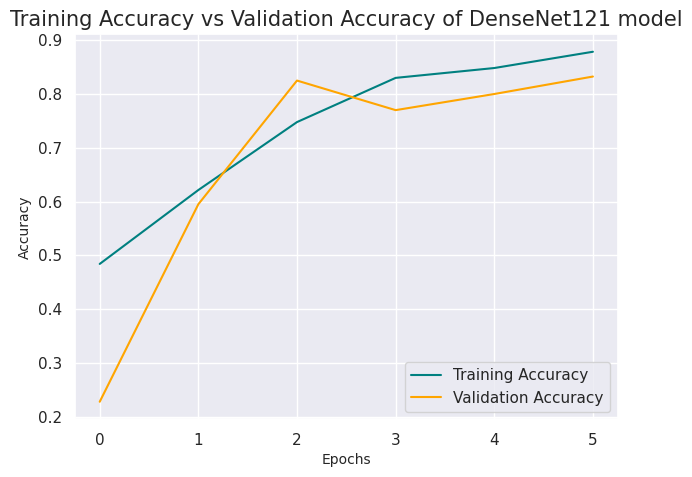

In [42]:
plt.figure(figsize = (7, 5))
plt.plot(history2.history['accuracy'], label = 'Training Accuracy', color = 'teal')
plt.plot(history2.history['val_accuracy'], label = 'Validation Accuracy', color = 'orange')
plt.title('Training Accuracy vs Validation Accuracy of DenseNet121 model', fontsize = 15)
plt.xlabel('Epochs', fontsize = 10)
plt.ylabel('Accuracy', fontsize = 10)
plt.legend()
plt.show()

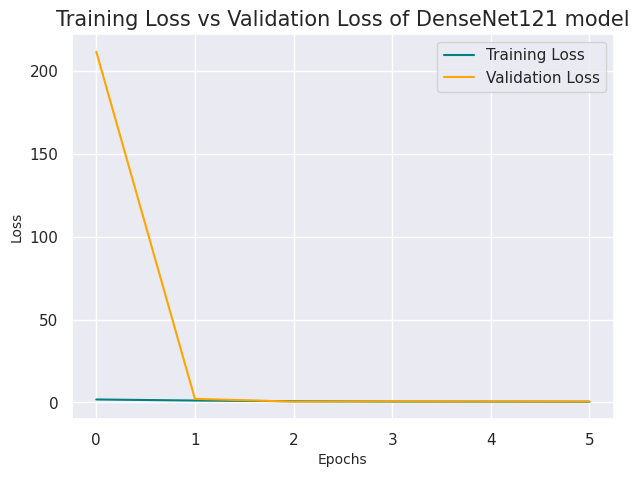

In [43]:
plt.figure(figsize = (7, 5))
plt.plot(history2.history['loss'], label = 'Training Loss', color = 'teal')
plt.plot(history2.history['val_loss'], label = 'Validation Loss', color = 'orange')
plt.title('Training Loss vs Validation Loss of DenseNet121 model', fontsize = 15)
plt.xlabel('Epochs', fontsize = 10)
plt.ylabel('Loss', fontsize = 10)
plt.legend()
plt.show()

In [44]:
model2.evaluate(X_test_scaled, y_test)

32/32 ━━━━━━━━━━━━━━━━━━━━ 7s 221ms/step - accuracy: 0.8290 - loss: 0.5931


[0.5478947162628174, 0.8339999914169312]

In [45]:
y_p2 = model2.predict(X_test_scaled)

32/32 ━━━━━━━━━━━━━━━━━━━━ 15s 248ms/step


In [46]:
y_pred2 = [np.argmax(i) for i in y_p2]

In [47]:
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.86      0.74      0.79       200
           1       0.91      0.71      0.80       200
           2       0.91      0.81      0.86       200
           3       0.96      0.94      0.95       200
           4       0.65      0.95      0.77       200

    accuracy                           0.83      1000
   macro avg       0.86      0.83      0.84      1000
weighted avg       0.86      0.83      0.84      1000



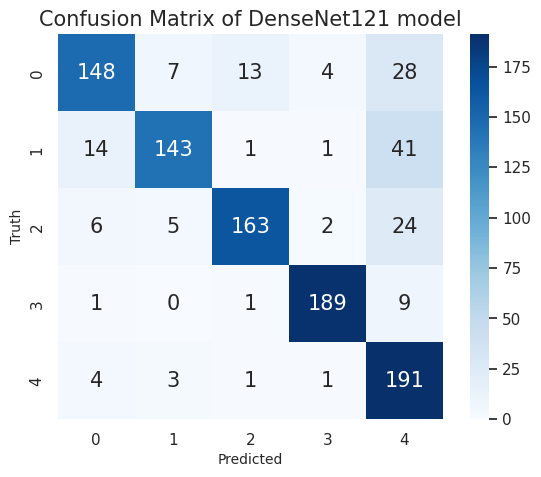

In [48]:
plt.figure(figsize = (7, 5))
sns.heatmap(confusion_matrix(y_test, y_pred2), annot = True, square = True, cbar = True, annot_kws = {'size' : 15}, fmt = 'd',
           cmap = 'Blues')
plt.title('Confusion Matrix of DenseNet121 model', fontsize = 15)
plt.xlabel('Predicted', fontsize = 10)
plt.ylabel('Truth', fontsize = 10)
plt.show()

In [49]:
base_model2 = ResNet50(weights = 'imagenet', include_top = False, input_shape = (80, 80, 3))

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [50]:
model3 = Sequential()

In [51]:
model3.add(base_model2)
model3.add(Flatten())
model3.add(Dense(5, activation = 'softmax'))

In [52]:
model3.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

In [53]:
early_stopping3 = EarlyStopping(monitor = 'val_loss', patience = 5)

In [54]:
history3 = model3.fit(X_train_scaled, y_train, epochs = 100, validation_split = 0.1, callbacks = [early_stopping3])

Epoch 1/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 80s 277ms/step - accuracy: 0.5295 - loss: 2.3940 - val_accuracy: 0.1875 - val_loss: 469420.7500
Epoch 2/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 7s 64ms/step - accuracy: 0.6307 - loss: 1.8465 - val_accuracy: 0.1875 - val_loss: 2148.1602
Epoch 3/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 7s 64ms/step - accuracy: 0.5421 - loss: 2.2189 - val_accuracy: 0.1900 - val_loss: 1210.9567
Epoch 4/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 7s 64ms/step - accuracy: 0.5477 - loss: 1.3764 - val_accuracy: 0.2275 - val_loss: 1.6043
Epoch 5/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 7s 64ms/step - accuracy: 0.6555 - loss: 1.0360 - val_accuracy: 0.2125 - val_loss: 1.5864
Epoch 6/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 7s 65ms/step - accuracy: 0.6969 - loss: 0.8448 - val_accuracy: 0.3075 - val_loss: 1.5087
Epoch 7/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 7s 65ms/step - accuracy: 0.7346 - loss: 0.7130 - val_accuracy: 0.4350 - val_loss: 1.4150
Epoch 8/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 7s 65ms/step - accuracy: 0.7779 - lo

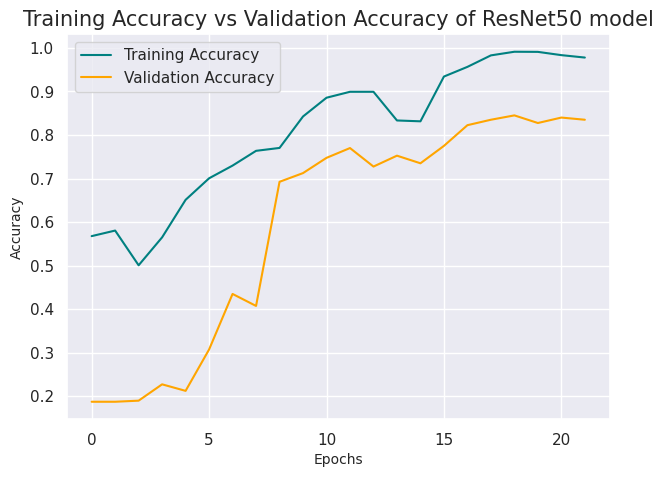

In [55]:
plt.figure(figsize = (7, 5))
plt.plot(history3.history['accuracy'], label = 'Training Accuracy', color = 'teal')
plt.plot(history3.history['val_accuracy'], label = 'Validation Accuracy', color = 'orange')
plt.title('Training Accuracy vs Validation Accuracy of ResNet50 model', fontsize = 15)
plt.xlabel('Epochs', fontsize = 10)
plt.ylabel('Accuracy', fontsize = 10)
plt.legend()
plt.show()

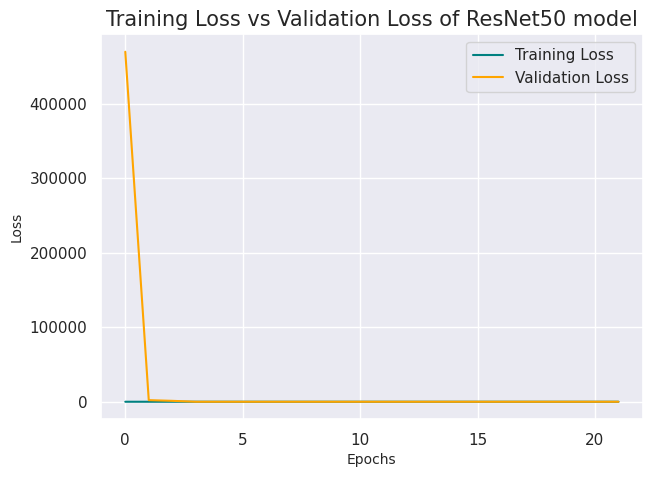

In [56]:
plt.figure(figsize = (7, 5))
plt.plot(history3.history['loss'], label = 'Training Loss', color = 'teal')
plt.plot(history3.history['val_loss'], label = 'Validation Loss', color = 'orange')
plt.title('Training Loss vs Validation Loss of ResNet50 model', fontsize = 15)
plt.xlabel('Epochs', fontsize = 10)
plt.ylabel('Loss', fontsize = 10)
plt.legend()
plt.show()

In [57]:
model3.evaluate(X_test_scaled, y_test)

32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 97ms/step - accuracy: 0.8758 - loss: 0.5448


[0.5967841148376465, 0.8669999837875366]

In [91]:
y_p3 = model3.predict(X_test_scaled)

32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step


In [92]:
y_pred3 = [np.argmax(i) for i in y_p3]

In [93]:
print(classification_report(y_test, y_pred3))

              precision    recall  f1-score   support

           0       0.79      0.82      0.81       200
           1       0.86      0.85      0.85       200
           2       0.82      0.84      0.83       200
           3       0.93      0.98      0.96       200
           4       0.94      0.84      0.89       200

    accuracy                           0.87      1000
   macro avg       0.87      0.87      0.87      1000
weighted avg       0.87      0.87      0.87      1000



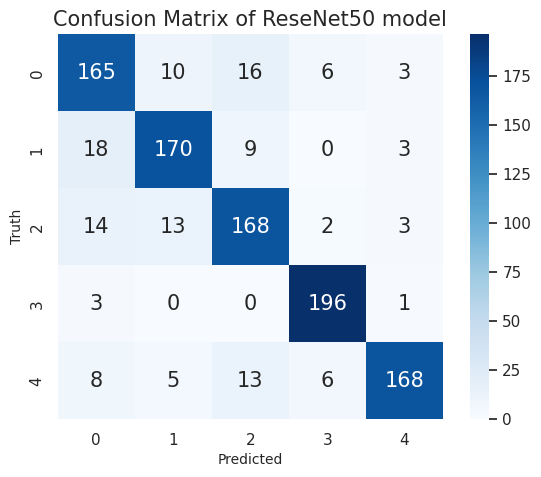

In [94]:
plt.figure(figsize = (7, 5))
sns.heatmap(confusion_matrix(y_test, y_pred3), annot = True, square = True, cbar = True, annot_kws = {'size' : 15}, fmt = 'd',
           cmap = 'Blues')
plt.title('Confusion Matrix of ReseNet50 model', fontsize = 15)
plt.xlabel('Predicted', fontsize = 10)
plt.ylabel('Truth', fontsize = 10)
plt.show()

In [95]:
base_model3 = VGG16(weights = 'imagenet', include_top = False, input_shape = (80, 80, 3))

In [96]:
model4 = Sequential()

In [97]:
model4.add(base_model3)
model4.add(Conv2D(32, (3, 3), padding = 'same', activation = 'relu'))
model4.add(BatchNormalization())
model4.add(MaxPooling2D(pool_size = (2, 2)))
model4.add(Flatten())
model4.add(Dense(5, activation = 'softmax'))

In [98]:
model4.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

In [99]:
early_stopping4 = EarlyStopping(monitor = 'val_loss', patience = 3)

In [100]:
history4 = model4.fit(X_train_scaled, y_train, epochs = 100, validation_split = 0.1, callbacks = [early_stopping4])

Epoch 1/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 18s 114ms/step - accuracy: 0.3083 - loss: 1.8162 - val_accuracy: 0.2600 - val_loss: 2.3029
Epoch 2/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 10s 86ms/step - accuracy: 0.4000 - loss: 1.3587 - val_accuracy: 0.3175 - val_loss: 1.5853
Epoch 3/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 10s 86ms/step - accuracy: 0.4684 - loss: 1.2545 - val_accuracy: 0.3825 - val_loss: 1.4380
Epoch 4/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 10s 86ms/step - accuracy: 0.5089 - loss: 1.1933 - val_accuracy: 0.4575 - val_loss: 1.3543
Epoch 5/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 10s 87ms/step - accuracy: 0.5234 - loss: 1.1349 - val_accuracy: 0.4775 - val_loss: 1.2787
Epoch 6/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 10s 87ms/step - accuracy: 0.5592 - loss: 1.0748 - val_accuracy: 0.5625 - val_loss: 1.0824
Epoch 7/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 10s 88ms/step - accuracy: 0.6140 - loss: 0.9817 - val_accuracy: 0.4900 - val_loss: 1.4112
Epoch 8/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 10s 88ms/step - accuracy: 0.6246 - loss: 

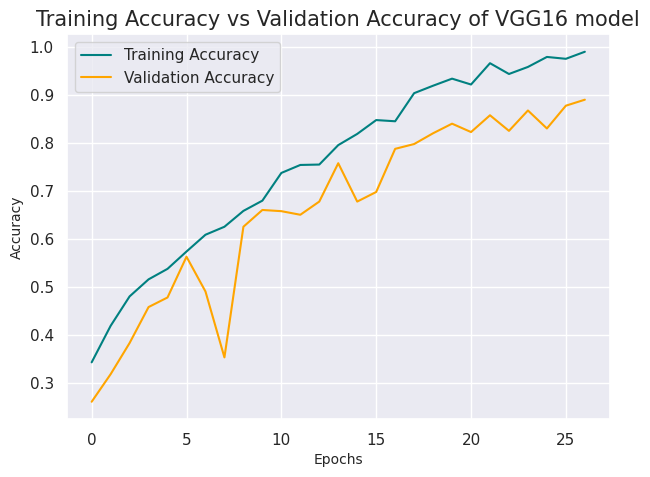

In [101]:
plt.figure(figsize = (7, 5))
plt.plot(history4.history['accuracy'], label = 'Training Accuracy', color = 'teal')
plt.plot(history4.history['val_accuracy'], label = 'Validation Accuracy', color = 'orange')
plt.title('Training Accuracy vs Validation Accuracy of VGG16 model', fontsize = 15)
plt.xlabel('Epochs', fontsize = 10)
plt.ylabel('Accuracy', fontsize = 10)
plt.legend()
plt.show()

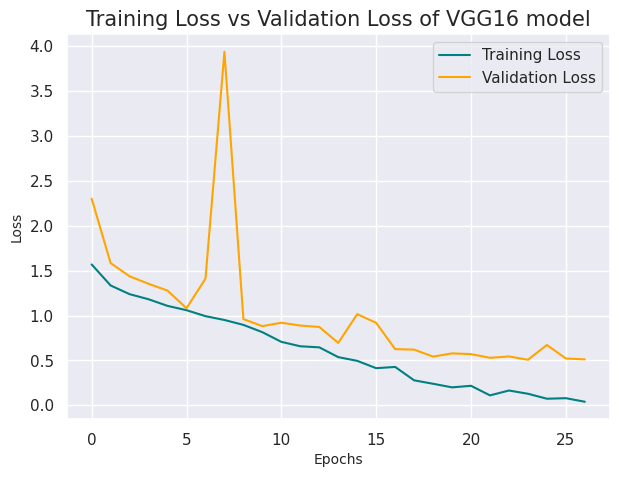

In [102]:
plt.figure(figsize = (7, 5))
plt.plot(history4.history['loss'], label = 'Training Loss', color = 'teal')
plt.plot(history4.history['val_loss'], label = 'Validation Loss', color = 'orange')
plt.title('Training Loss vs Validation Loss of VGG16 model', fontsize = 15)
plt.xlabel('Epochs', fontsize = 10)
plt.ylabel('Loss', fontsize = 10)
plt.legend()
plt.show()

In [103]:
model4.evaluate(X_test_scaled, y_test)

32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - accuracy: 0.8775 - loss: 0.5834


[0.5842810273170471, 0.8730000257492065]

In [104]:
y_p4 = model4.predict(X_test_scaled)

32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step


In [105]:
y_pred4 = [np.argmax(i) for i in y_p4]

In [106]:
print(classification_report(y_test, y_pred4))

              precision    recall  f1-score   support

           0       0.77      0.86      0.81       200
           1       0.88      0.88      0.88       200
           2       0.82      0.89      0.85       200
           3       0.99      0.95      0.97       200
           4       0.95      0.79      0.86       200

    accuracy                           0.87      1000
   macro avg       0.88      0.87      0.87      1000
weighted avg       0.88      0.87      0.87      1000



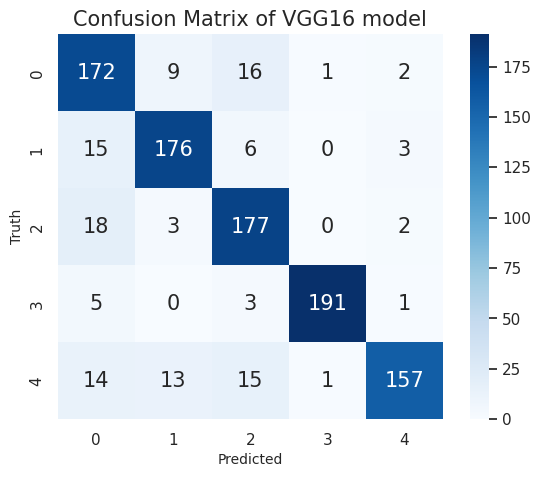

In [107]:
plt.figure(figsize = (7, 5))
sns.heatmap(confusion_matrix(y_test, y_pred4), annot = True, square = True, cbar = True, annot_kws = {'size' : 15}, fmt = 'd',
           cmap = 'Blues')
plt.title('Confusion Matrix of VGG16 model', fontsize = 15)
plt.xlabel('Predicted', fontsize = 10)
plt.ylabel('Truth', fontsize = 10)
plt.show()